In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv("https://raw.githubusercontent.com/harsaihaj/Autism-Detection/refs/heads/main/Toddler%20Autism%20dataset%20July%202018.csv")

In [31]:
df1 = df.copy()

In [32]:
df.head(5)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [33]:
df.shape

(1054, 19)

In [35]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [36]:
df = df.rename(columns={"Age_Mons":"Age Months","Family_mem_with_ASD":"Family Memeber with ASD","Class/ASD Traits ":"ASD Traits"})
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age Months', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family Memeber with ASD', 'Who completed the test', 'ASD Traits'],
      dtype='object')

In [37]:
df.isnull().sum()

Case_No                    0
A1                         0
A2                         0
A3                         0
A4                         0
A5                         0
A6                         0
A7                         0
A8                         0
A9                         0
A10                        0
Age Months                 0
Qchat-10-Score             0
Sex                        0
Ethnicity                  0
Jaundice                   0
Family Memeber with ASD    0
Who completed the test     0
ASD Traits                 0
dtype: int64

In [38]:
df["Ethnicity"].value_counts()

Ethnicity
White European    334
asian             299
middle eastern    188
south asian        60
black              53
Hispanic           40
Others             35
Latino             26
mixed               8
Pacifica            8
Native Indian       3
Name: count, dtype: int64

In [39]:
df["Ethnicity"] = df["Ethnicity"].replace("mixed","Other")
df["Ethnicity"] = df["Ethnicity"].replace("Native Indian","Indian")
df["Ethnicity"] = df["Ethnicity"].replace("asian","Other Asians")
df["Ethnicity"] = df["Ethnicity"].replace("middle eastern","Middle Easters")
df["Ethnicity"] = df["Ethnicity"].replace("south asian","South Asian")
df["Ethnicity"] = df["Ethnicity"].replace("black", "African")


In [40]:
df["Ethnicity"].value_counts()

Ethnicity
White European    334
Other Asians      299
Middle Easters    188
South Asian        60
African            53
Hispanic           40
Others             35
Latino             26
Other               8
Pacifica            8
Indian              3
Name: count, dtype: int64

In [41]:
df["Who completed the test"].unique()

array(['family member', 'Health Care Professional',
       'Health care professional', 'Self', 'Others'], dtype=object)

In [42]:
df["Who completed the test"] = df["Who completed the test"].replace("family member", "Family Member")
df["Who completed the test"] = df["Who completed the test"].replace("Health care professional", "Health Care Professional")

In [43]:
df["Who completed the test"].value_counts()

Who completed the test
Family Member               1018
Health Care Professional      29
Self                           4
Others                         3
Name: count, dtype: int64

In [44]:
cat_df = df[["Sex", "Ethnicity", "Jaundice", "Who completed the test", "Family Memeber with ASD", "ASD Traits"]]
num_df = df[["A1", "A2", "A3", "A4","A5","A6", "A7", "A8", "A9", "A10", "Qchat-10-Score", "Age Months"]]

In [45]:
df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age Months,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family Memeber with ASD,Who completed the test,ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,Middle Easters,yes,no,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,Family Member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,Middle Easters,yes,no,Family Member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,Family Member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,Family Member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,Family Member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,African,yes,no,Family Member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,Middle Easters,yes,no,Family Member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,Family Member,No


In [46]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age Months,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


<Axes: >

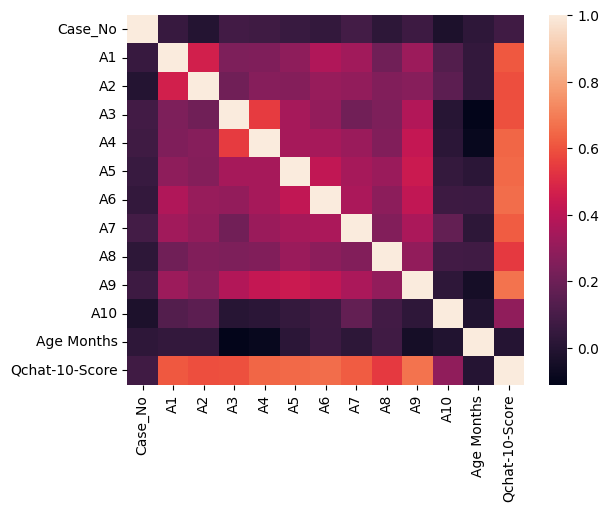

In [47]:
import seaborn as sns
import pandas as pd
import numpy as np
numerical_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numerical_cols].corr()

sns.heatmap(corr_matrix)

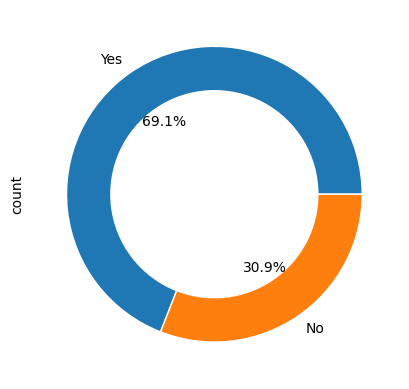

In [48]:
df["ASD Traits"].value_counts().plot(kind="pie", autopct="%1.1f%%", wedgeprops=dict(width=.3, edgecolor='w'));

In [49]:
df1.drop(columns=["Case_No"], inplace=True)


In [50]:
mini = df1["Age_Mons"].min()
maxi = df1["Age_Mons"].max()
print(f"Min Age: {mini}")
print(f"Max Age: {maxi}")

Min Age: 12
Max Age: 36


In [51]:
df1["Age"] = df1["Age_Mons"]/12
df1.drop(columns=["Age_Mons"], inplace=True)

In [52]:
df1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits,Age
0,0,0,0,0,0,0,1,1,0,1,3,f,middle eastern,yes,no,family member,No,2.333333
1,1,1,0,0,0,1,1,0,0,0,4,m,White European,yes,no,family member,Yes,3.000000
2,1,0,0,0,0,0,1,1,0,1,4,m,middle eastern,yes,no,family member,Yes,3.000000
3,1,1,1,1,1,1,1,1,1,1,10,m,Hispanic,no,no,family member,Yes,2.000000
4,1,1,0,1,1,1,1,1,1,1,9,f,White European,no,yes,family member,Yes,1.666667


In [53]:
order = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',  'Age',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'Class/ASD Traits ']
df1 = df1[order]

In [55]:
df1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,2.333333,3,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,3.000000,4,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,3.000000,4,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,2.000000,10,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,1.666667,9,f,White European,no,yes,family member,Yes


In [56]:
df1["Class/ASD Traits "].value_counts()

Class/ASD Traits 
Yes    728
No     326
Name: count, dtype: int64

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1["Sex"] = le.fit_transform(df1["Sex"])
df1["Jaundice"] = le.fit_transform(df1["Jaundice"])
df1["Family_mem_with_ASD"] = le.fit_transform(df1["Family_mem_with_ASD"])
df1["Class/ASD Traits "] = le.fit_transform(df1["Class/ASD Traits "])
df1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,2.333333,3,0,middle eastern,1,0,family member,0
1,1,1,0,0,0,1,1,0,0,0,3.000000,4,1,White European,1,0,family member,1
2,1,0,0,0,0,0,1,1,0,1,3.000000,4,1,middle eastern,1,0,family member,1
3,1,1,1,1,1,1,1,1,1,1,2.000000,10,1,Hispanic,0,0,family member,1
4,1,1,0,1,1,1,1,1,1,1,1.666667,9,0,White European,0,1,family member,1


In [58]:
df1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,2.333333,3,0,middle eastern,1,0,family member,0
1,1,1,0,0,0,1,1,0,0,0,3.000000,4,1,White European,1,0,family member,1
2,1,0,0,0,0,0,1,1,0,1,3.000000,4,1,middle eastern,1,0,family member,1
3,1,1,1,1,1,1,1,1,1,1,2.000000,10,1,Hispanic,0,0,family member,1
4,1,1,0,1,1,1,1,1,1,1,1.666667,9,0,White European,0,1,family member,1


In [59]:
df1 = pd.get_dummies(df1, columns=["Ethnicity", "Who completed the test"], drop_first=True)
df1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Who completed the test_Health care professional,Who completed the test_Others,Who completed the test_Self,Who completed the test_family member
0,0,0,0,0,0,0,1,1,0,1,...,False,False,False,True,False,False,False,False,False,True
1,1,1,0,0,0,1,1,0,0,0,...,True,False,False,False,False,False,False,False,False,True
2,1,0,0,0,0,0,1,1,0,1,...,False,False,False,True,False,False,False,False,False,True
3,1,1,1,1,1,1,1,1,1,1,...,False,False,False,False,False,False,False,False,False,True
4,1,1,0,1,1,1,1,1,1,1,...,True,False,False,False,False,False,False,False,False,True


In [60]:
# Convert all boolean columns (True/False) to integers (1/0)
df1[['Ethnicity_White European', 'Ethnicity_asian', 'Ethnicity_black',
     'Ethnicity_middle eastern', 'Ethnicity_mixed', 'Ethnicity_south asian',
     'Who completed the test_Health care professional', 'Who completed the test_Others',
     'Who completed the test_Self', 'Who completed the test_family member']] = \
df1[['Ethnicity_White European', 'Ethnicity_asian', 'Ethnicity_black',
     'Ethnicity_middle eastern', 'Ethnicity_mixed', 'Ethnicity_south asian',
     'Who completed the test_Health care professional', 'Who completed the test_Others',
     'Who completed the test_Self', 'Who completed the test_family member']].astype(int)

# Display the first few rows to check the changes
df1.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Who completed the test_Health care professional,Who completed the test_Others,Who completed the test_Self,Who completed the test_family member
0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,1
1,1,1,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,1
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,1,1,0,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,1


In [61]:
df1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Who completed the test_Health care professional,Who completed the test_Others,Who completed the test_Self,Who completed the test_family member
0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,1
1,1,1,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,1
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,1,1,0,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,1


In [62]:
df1.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age',
       'Qchat-10-Score', 'Sex', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD Traits ', 'Ethnicity_Latino', 'Ethnicity_Native Indian',
       'Ethnicity_Others', 'Ethnicity_Pacifica', 'Ethnicity_White European',
       'Ethnicity_asian', 'Ethnicity_black', 'Ethnicity_middle eastern',
       'Ethnicity_mixed', 'Ethnicity_south asian',
       'Who completed the test_Health care professional',
       'Who completed the test_Others', 'Who completed the test_Self',
       'Who completed the test_family member'],
      dtype='object')

In [63]:
order = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age',
       'Qchat-10-Score', 'Sex', 'Jaundice', 'Family_mem_with_ASD', 'Ethnicity_Latino',
        'Ethnicity_Native Indian','Ethnicity_Others', 'Ethnicity_Pacifica',
        'Ethnicity_White European','Ethnicity_asian', 'Ethnicity_black', 'Ethnicity_middle eastern',
       'Ethnicity_mixed', 'Ethnicity_south asian',
       'Who completed the test_Health care professional',
       'Who completed the test_Others', 'Who completed the test_Self',
       'Who completed the test_family member', 'Class/ASD Traits ']

df1 = df1[order]
df1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Who completed the test_Health care professional,Who completed the test_Others,Who completed the test_Self,Who completed the test_family member,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
1,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,1,0,0,0,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,1
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
4,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1


In [64]:
from sklearn.model_selection import train_test_split

X = df1.drop(columns=["Class/ASD Traits "])
y = df1["Class/ASD Traits "]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [65]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Import necessary functions from sklearn.metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

In [67]:
def train_model(model,X_train_scaled, y_train, X_test_scaled,y_test):
  model.fit(X_train_scaled,y_train)
  y_pred = model.predict(X_test_scaled)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  score_df = pd.DataFrame([[accuracy,precision,recall,f1]],columns=["accuracy", "precision", "recall", "f1"])
  return score_df

In [68]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

results = train_model(model,X_train_scaled,y_train,X_test_scaled,y_test)
results.index = ["Logistic Regression"]
results

,accuracy,precision,recall,f1
Logistic Regression,1.0,1.0,1.0,1.0


In [69]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
decision_tree_results = train_model(model,X_train_scaled,y_train,X_test_scaled,y_test)
decision_tree_results.index = ["Decision Tree Classifier"]
results = pd.concat([results, decision_tree_results])
results

,accuracy,precision,recall,f1
Logistic Regression,1.0,1.0,1.0,1.0
Decision Tree Classifier,1.0,1.0,1.0,1.0


In [70]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
random_forest_results = train_model(model,X_train_scaled,y_train, X_test_scaled, y_test)
random_forest_results.index = ["Random Forest Classifier"]
results = pd.concat([results, random_forest_results])
results

,accuracy,precision,recall,f1
Logistic Regression,1.0,1.0,1.0,1.0
Decision Tree Classifier,1.0,1.0,1.0,1.0
Random Forest Classifier,1.0,1.0,1.0,1.0


In [71]:
from sklearn.svm import SVC

model = SVC()
svm_results = train_model(model,X_train_scaled,y_train,X_test_scaled,y_test)
svm_results.index = ["SVM classifier"]
results = pd.concat([results, svm_results])
results

,accuracy,precision,recall,f1
Logistic Regression,1.000000,1.000000,1.000000,1.000000
Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000
Random Forest Classifier,1.000000,1.000000,1.000000,1.000000
SVM classifier,0.985782,0.992908,0.985915,0.989399


In [72]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier
model = KNeighborsClassifier() # Added parentheses to instantiate the class
knn_results = train_model(model,X_train_scaled,y_train,X_test_scaled,y_test)

knn_results.index = ["KNeighborsClassifier"]

results = pd.concat([results, knn_results])
results

,accuracy,precision,recall,f1
Logistic Regression,1.000000,1.000000,1.000000,1.000000
Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000
Random Forest Classifier,1.000000,1.000000,1.000000,1.000000
SVM classifier,0.985782,0.992908,0.985915,0.989399
KNeighborsClassifier,0.971564,1.000000,0.957746,0.978417


In [73]:
results

,accuracy,precision,recall,f1
Logistic Regression,1.000000,1.000000,1.000000,1.000000
Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000
Random Forest Classifier,1.000000,1.000000,1.000000,1.000000
SVM classifier,0.985782,0.992908,0.985915,0.989399
KNeighborsClassifier,0.971564,1.000000,0.957746,0.978417


<Axes: xlabel='Logistic Regression', ylabel='None'>

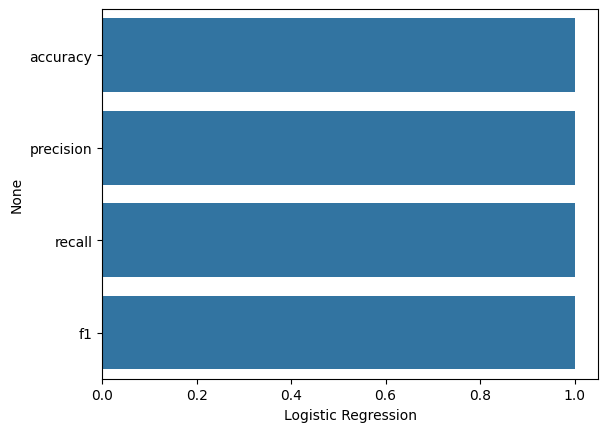

In [74]:
acc = results.iloc[0]
sns.barplot(x=acc, y=acc.index)

<Axes: xlabel='Decision Tree Classifier', ylabel='None'>

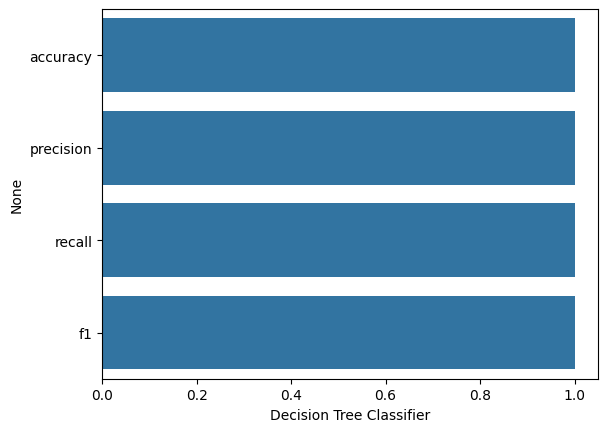

In [75]:
prec = results.iloc[1]
sns.barplot(x=prec, y=prec.index)

<Axes: xlabel='Random Forest Classifier', ylabel='None'>

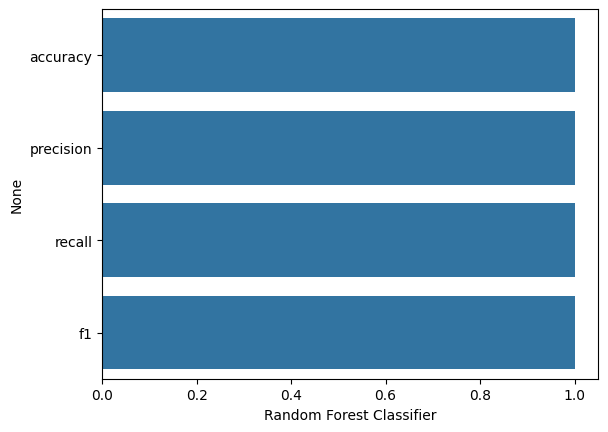

In [76]:
rec = results.iloc[2]
sns.barplot(x=rec, y=rec.index)

<Axes: xlabel='SVM classifier', ylabel='None'>

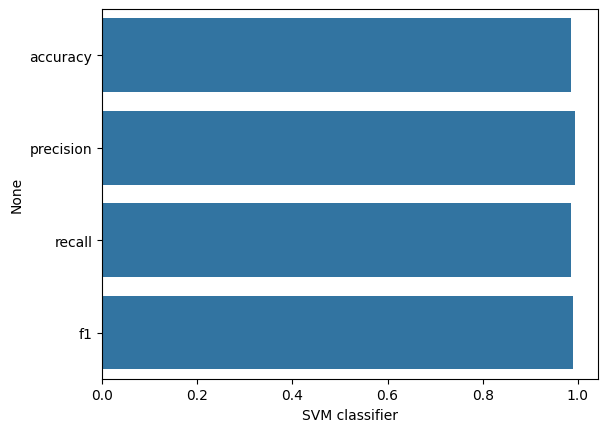

In [77]:
f1 = results.iloc[3]
sns.barplot(x=f1, y=f1.index)

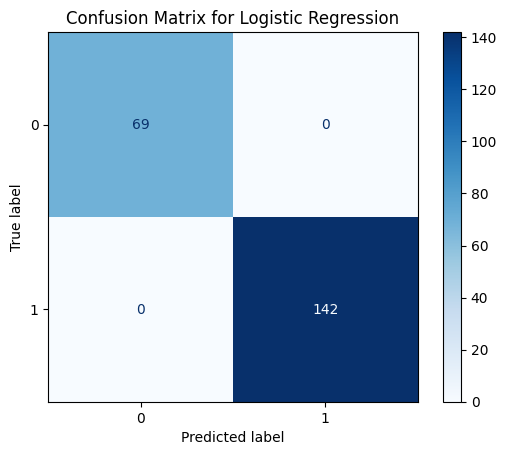

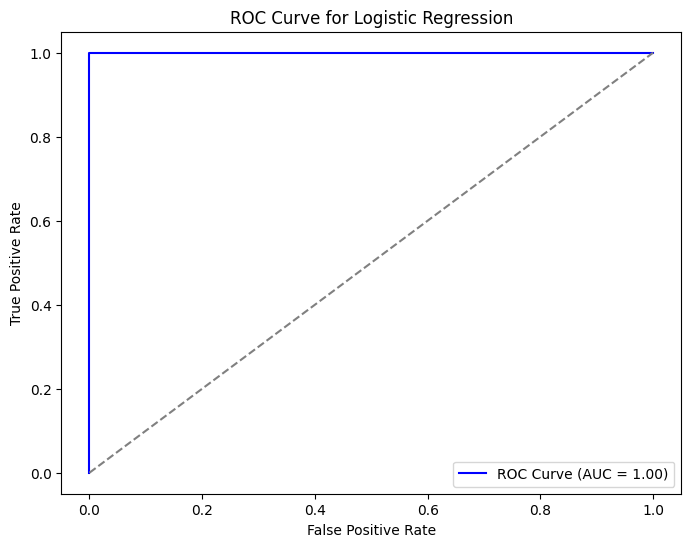

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test_scaled, y_test, model_name):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Function to plot ROC Curve
def plot_roc_curve(model, X_test_scaled, y_test, model_name):
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probability for positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random chance
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Example: Plot confusion matrix and ROC curve for Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

plot_confusion_matrix(model, X_test_scaled, y_test, 'Logistic Regression')
plot_roc_curve(model, X_test_scaled, y_test, 'Logistic Regression')

# Repeat the above lines with other models


C:\Users\arnav\AppData\Local\Temp\ipykernel_5804\2106414208.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=feature_importance_df, palette="viridis")


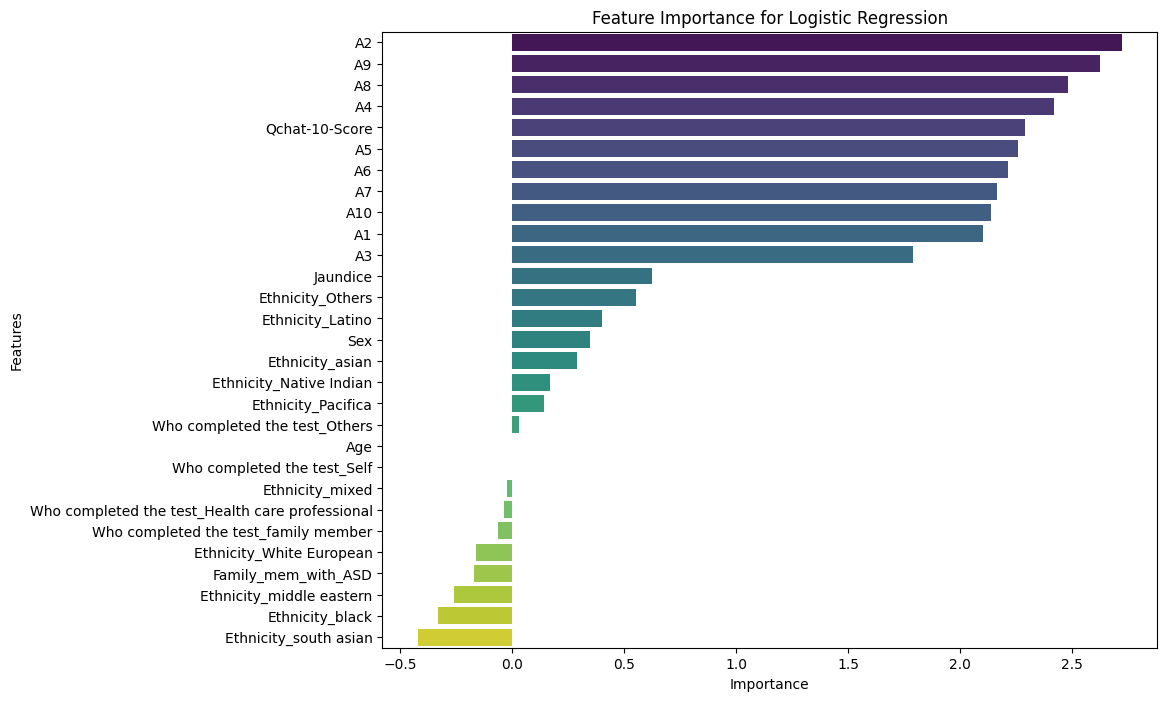

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot feature importance
def plot_feature_importance(model, model_name, feature_names):
    if hasattr(model, "feature_importances_"):  # For tree-based models
        importance = model.feature_importances_
    elif hasattr(model, "coef_"):  # For linear models like Logistic Regression
        importance = model.coef_[0]
    else:
        print(f"Feature importance not supported for {model_name}")
        return
    
    # Create a DataFrame with feature names and their importance
    feature_importance_df = pd.DataFrame({"feature": feature_names, "importance": importance})
    feature_importance_df = feature_importance_df.sort_values(by="importance", ascending=False)
    
    # Plotting
    plt.figure(figsize=(10, 8))
    sns.barplot(x="importance", y="feature", data=feature_importance_df, palette="viridis")
    plt.title(f"Feature Importance for {model_name}")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

# Feature names from the dataset
feature_names = X.columns

# Example: Feature importance for RandomForestClassifier
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
plot_feature_importance(model, "Logistic Regression", feature_names)

# Repeat with other models like DecisionTreeClassifier or LogisticRegression
